U.S. Dept. of Education College Scorecard
Notebook for Codementor Machine Learning Class 1

Download data from Kaggle.  Includes a 1.2GB sqlite database.  Connect to the database, extract data, create a Pandas dataframe for study.

Python has a handy built-in module for sqlite.  See: https://docs.python.org/2/library/sqlite3.html

In [15]:
import sqlite3
conn = sqlite3.connect('C:Desktop/CM-ML-Class/1/data/database.sqlite')


In [22]:
# List the tables in this database!

query = """
SELECT name from sqlite_master WHERE type='table';
"""
c = conn.cursor()
c.execute(query)
data = c.fetchall()  # you can also iterate over c e.g. for row in c: doStuff(data)
print data

[(u'Scorecard',)]


A pandas dataframe will serve as our starting point for data exploration and predictive modeling.  Pandas includes a large number of interfaces to different data types, including sqlite.  See: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_sql_query.html

The table fields are documented in the pdfs that accompany the data.  It's important to get a basic analysis started quickly.  Let's choose some fields related to our idea (college cost vs. value) and get to work!  We can return later to grab more raw data.

In [19]:
import pandas

In [29]:
query = """
SELECT INSTNM,
       COSTT4_A AverageCostOfAttendance,
       md_earn_wne_p10 MedianEarnings,
       Year,
       UGDS,
       SATMTMID Math,
       SATVRMID Verbal,
       SATWRMID Writing,
       STABBR State,
       GRAD_DEBT_MDN Debt,
       C150_4 completionRate
       
FROM Scorecard
WHERE Year='2011'
"""
# I found that 2011 is the latest year with earnings data!

df = pandas.read_sql(query, conn)

In [30]:
df

,INSTNM,AverageCostOfAttendance,MedianEarnings,Year,UGDS,Math,Verbal,Writing,State,Debt,completionRate
0,Alabama A & M University,14965.0,31400,2011,4112.0,405.0,410.0,405.0,AL,29573,0.3171
1,University of Alabama at Birmingham,19547.0,40300,2011,10854.0,570.0,565.0,NaN,AL,20700,0.4462
2,Amridge University,11540.0,38100,2011,360.0,NaN,NaN,NaN,AL,22370,0.2500
3,University of Alabama at Huntsville,19072.0,46600,2011,5755.0,595.0,565.0,NaN,AL,22000,0.4537
4,Alabama State University,15986.0,27800,2011,4719.0,400.0,405.0,NaN,AL,31000,0.2621
5,The University of Alabama,21681.0,42400,2011,25613.0,570.0,560.0,555.0,AL,22500,0.6579
6,Central Alabama Community College,7485.0,27100,2011,2338.0,NaN,NaN,NaN,AL,PrivacySuppressed,NaN
7,Athens State University,NaN,39700,2011,3218.0,NaN,NaN,NaN,AL,17850,NaN
8,Auburn University at Montgomery,15179.0,34800,2011,4403.0,NaN,NaN,NaN,AL,21169,0.3327
9,Auburn University,21140.0,45400,2011,20436.0,570.0,550.0,540.0,AL,20500,0.6628


In [31]:
df.describe()

,AverageCostOfAttendance,Year,UGDS,Math,Verbal,Writing,completionRate
count,4155.000000,7675.0,7052.000000,1290.000000,1267.000000,748.000000,2370.000000
mean,23183.825993,2011.0,2440.643647,531.537209,524.199684,521.701872,0.473112
std,11432.356729,0.0,5848.348428,70.669769,68.647130,78.698776,0.216701
min,2200.000000,2011.0,0.000000,350.000000,285.000000,325.000000,0.000000
25%,13456.000000,2011.0,136.000000,485.000000,480.000000,465.000000,0.318050
50%,21785.000000,2011.0,513.000000,520.000000,515.000000,510.000000,0.466300
75%,29706.000000,2011.0,2083.750000,565.000000,560.000000,562.750000,0.622150
max,73450.000000,2011.0,249604.000000,780.000000,750.000000,755.000000,1.000000


In [45]:
df['earn'] = pandas.to_numeric(df['MedianEarnings'], errors='coerce')

First look at clusters
See http://scikit-learn.org/stable/modules/clustering.html

In [35]:
from sklearn.cluster import KMeans

In [36]:
km = KMeans(init='k-means++', n_clusters=3)

In [48]:
dfc = df[['Math', 'Verbal', 'Writing', 'AverageCostOfAttendance', 'earn']].dropna()

In [49]:
dfc.describe()

,Math,Verbal,Writing,AverageCostOfAttendance,earn
count,713.000000,713.000000,713.000000,713.000000,713.000000
mean,537.531557,530.654979,520.991585,32355.120617,44145.301543
std,77.621937,73.926561,78.977240,12407.498681,11049.503444
min,350.000000,285.000000,325.000000,2200.000000,17600.000000
25%,485.000000,480.000000,465.000000,20820.000000,36800.000000
50%,525.000000,520.000000,510.000000,31639.000000,42600.000000
75%,575.000000,570.000000,560.000000,41369.000000,48800.000000
max,780.000000,750.000000,755.000000,56681.000000,116400.000000


In [50]:
km.fit(dfc)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [51]:
clusters = km.predict(dfc)

In [52]:
clusters

array([0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 0, 2, 2,
       1, 1, 1, 2, 0, 2, 0, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2, 0, 2, 2, 1,
       1, 2, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 0, 2, 1, 0,
       2, 2, 0, 2, 2, 1, 0, 1, 1, 1, 0, 0, 2, 1, 1, 2, 2, 0, 0, 0, 0, 0, 0,
       0, 2, 1, 0, 2, 2, 0, 2, 2, 2, 0, 0, 0, 2, 0, 0, 2, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2,
       0, 0, 1, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2,
       2, 1, 0, 2, 0, 2, 0, 0, 0, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 1, 2, 1, 0, 1, 2, 1, 2, 2, 0, 1, 0, 2, 1, 1, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 2,
       0, 0,

In [53]:
dfc['cluster'] = clusters

In [57]:
dfc.describe()

,Math,Verbal,Writing,AverageCostOfAttendance,earn,cluster
count,713.000000,713.000000,713.000000,713.000000,713.000000,713.000000
mean,537.531557,530.654979,520.991585,32355.120617,44145.301543,0.976157
std,77.621937,73.926561,78.977240,12407.498681,11049.503444,0.927570
min,350.000000,285.000000,325.000000,2200.000000,17600.000000,0.000000
25%,485.000000,480.000000,465.000000,20820.000000,36800.000000,0.000000
50%,525.000000,520.000000,510.000000,31639.000000,42600.000000,1.000000
75%,575.000000,570.000000,560.000000,41369.000000,48800.000000,2.000000
max,780.000000,750.000000,755.000000,56681.000000,116400.000000,2.000000


In [54]:
dfc

,Math,Verbal,Writing,AverageCostOfAttendance,earn,cluster
0,405.0,410.0,405.0,14965.0,31400.0,0
5,570.0,560.0,555.0,21681.0,42400.0,0
9,570.0,550.0,540.0,21140.0,45400.0,0
10,560.0,560.0,560.0,39848.0,41900.0,2
16,363.0,382.0,352.0,25198.0,37600.0,0
23,506.0,518.0,477.0,29369.0,37100.0,0
30,460.0,495.0,480.0,26090.0,30700.0,0
50,490.0,503.0,490.0,13746.0,38300.0,0
51,529.0,557.0,530.0,40233.0,43800.0,2
52,525.0,420.0,325.0,18509.0,28800.0,0


Dataframe visualization: see http://pandas.pydata.org/pandas-docs/stable/visualization.html

In [55]:
%matplotlib inline

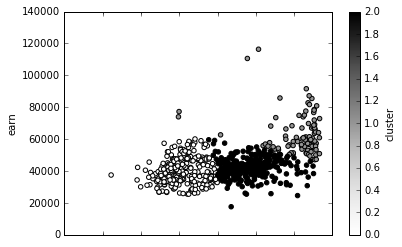

In [58]:
dfc.plot.scatter(x='AverageCostOfAttendance', y='earn', c='cluster');